In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_excel('topsis_original.xlsx')
year_list = data['Year'].unique().tolist()
data.set_index(['Country','Year'],inplace=True)
data

,,Food price inflation,Net exports Value,Food CPI,PPI Value
Country,Year,,,,
Afghanistan,2000,0.086833,-2177409,3.403726e+01,95.370896
Albania,2000,0.021930,-1844081,6.344153e+01,72.602660
Algeria,2000,0.013667,662242,5.189481e+01,54.095619
Angola,2000,1.851949,2592853,1.181357e+00,104.025401
Antigua and Barbuda,2000,0.025332,-506213,6.258868e+01,57.494706
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,1434.915544,-8451263,4.623971e+08,21.069213
Viet Nam,2019,0.040789,-4417895,1.087972e+02,65.090678
Yemen,2019,0.047224,-11841381,1.220177e+02,65.896369


In [2]:
data.describe()

,Food price inflation,Net exports Value,Food CPI,PPI Value
count,3760.000000,3.760000e+03,3.760000e+03,3760.000000
mean,0.610225,-1.629592e+06,1.321804e+05,83.008908
std,24.251461,6.245724e+07,7.542290e+06,23.451693
min,-0.177834,-8.233195e+08,3.570000e-04,2.228191
25%,0.016984,-4.826622e+06,6.102230e+01,67.471884
50%,0.042961,-8.088200e+05,8.305200e+01,87.478941
75%,0.084696,1.535754e+06,9.988564e+01,100.036975
max,1434.915544,3.626292e+08,4.623971e+08,186.543846


In [3]:
for column in data.columns:
    Percentile = np.percentile(data[column],[0,25,50,75,100])
    ageIQR = Percentile[3] - Percentile[1]
    UpLimit = Percentile[3]+ageIQR*1.5
    DownLimit = Percentile[1]-ageIQR*1.5
    data.loc[data[column] > UpLimit,column] = UpLimit
    data.loc[data[column] < DownLimit,column] = DownLimit
data

,,Food price inflation,Net exports Value,Food CPI,PPI Value
Country,Year,,,,
Afghanistan,2000,0.086833,-2177409.0,34.037261,95.370896
Albania,2000,0.021930,-1844081.0,63.441535,72.602660
Algeria,2000,0.013667,662242.0,51.894808,54.095619
Angola,2000,0.186264,2592853.0,2.727282,104.025401
Antigua and Barbuda,2000,0.025332,-506213.0,62.588680,57.494706
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.186264,-8451263.0,158.180658,21.069213
Viet Nam,2019,0.040789,-4417895.0,108.797175,65.090678
Yemen,2019,0.047224,-11841381.0,122.017734,65.896369


,Food price inflation,Net exports Value,Food CPI,PPI Value
count,3760.000000,3.760000e+03,3760.000000,3760.000000
mean,0.057234,-1.306947e+06,79.140701,83.023177
std,0.055614,7.429158e+06,28.085724,23.070594
min,-0.084584,-1.437018e+07,2.727282,18.624249
25%,0.016984,-4.826622e+06,61.022298,67.471884
50%,0.042961,-8.088200e+05,83.052004,87.478941
75%,0.084696,1.535754e+06,99.885642,100.036975
max,0.186264,1.107932e+07,158.180658,148.884610


<AxesSubplot:>

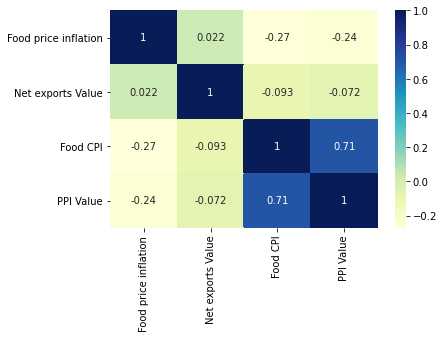

In [4]:
display(data.describe())
sns.heatmap(data.corr(), annot=True,cmap='YlGnBu')

In [5]:
def entropyWeight(data):
    P = np.array(data)
    # 计算熵值
    E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)
    # 计算权系数
    return (1 - E) / (1 - E).sum()
entropyWeight(data)

array([-4.08284595e-09,  9.99978966e-01,  1.02437454e-05,  1.07948270e-05])

In [6]:
# standard
def Max(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

# mid 
def Mid(datas, x_best):
    temp_datas = datas - x_best
    M = np.max(abs(temp_datas))
    answer_datas = 1 - abs(datas - x_best) / M     
    return answer_datas

# standart min
def Min(data):
    _range = np.max(data) - np.min(data)
    return (np.max(data) - data) / _range

# Middle
def Middle(datas, x_min, x_max):
    M = max(x_min - np.min(datas), np.max(datas) - x_max)
    answer_list = []
    for i in datas:
        if(i < x_min):
            answer_list.append(1 - (x_min-i) /M)   
        elif( x_min <= i <= x_max):
            answer_list.append(1)
        else:
            answer_list.append(1 - (i - x_max)/M)
    return np.array(answer_list)

def topsis(data, weight=None):  
    
    # weight
    weight = entropyWeight(data) if weight is None else np.array(weight)
    
    # best
    Z = pd.DataFrame([(data*weight.T).min(), (data*weight.T).max()], index=['负理想解', '正理想解'])
    #Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])
    

    Result = data.copy()
    #Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1))
    #Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))
    Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 ).sum(axis=1))
    Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 ).sum(axis=1))

    # Score
    Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
    Result['排序'] = Result.rank(ascending=False)['综合得分指数']

    return Result, Z, weight


In [11]:
all_data = pd.DataFrame()
for year in year_list:
    one_year_data = data.reset_index()
    one_year_data = one_year_data[one_year_data['Year']==year]
    one_year_data = one_year_data.set_index(['Country','Year'])
    
    # Standard
    one_year_data['Food price inflation'] = Mid(
        one_year_data['Food price inflation'],0.025)
    
    one_year_data['Net exports Value'] = Mid(
        one_year_data['Net exports Value'],0)
    
    one_year_data['Food CPI'] = Middle(
        one_year_data['Food CPI'],80,110)
    
    one_year_data['PPI Value'] = Middle(
        one_year_data['PPI Value'],80,110)
    # TOPSIS
    one_year_data ,z,weight= topsis(one_year_data)
    display(one_year_data)
    display(z)
    print('Weight:',weight)
    all_data = pd.concat([all_data,one_year_data],axis=0)
all_data['Score'] = all_data['综合得分指数']
all_data['Rank'] = all_data['排序']
all_data.drop(['正理想解','负理想解','综合得分指数','排序'],axis=1,inplace=True)
all_data

,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2000,0.616575,0.848477,0.405188,1.000000,1.073761,1.504744,0.583572,87.0
Albania,2000,0.980963,0.871673,0.785714,0.879475,1.283677,1.764348,0.578850,123.0
Algeria,2000,0.929725,0.953916,0.636286,0.577938,1.148044,1.585313,0.579987,111.0
Angola,2000,0.000000,0.819567,0.000000,1.000000,1.052679,1.292939,0.551215,175.0
Antigua and Barbuda,2000,0.997944,0.964773,0.774677,0.633319,1.254505,1.711110,0.576983,130.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2000,0.402147,0.311063,0.000000,0.000000,0.508486,0.508412,0.499964,184.0
Viet Nam,2000,0.688080,0.675803,0.308801,0.199728,0.708476,1.032188,0.592985,44.0
Yemen,2000,0.389137,0.884394,0.227121,0.110115,0.774810,0.998644,0.563107,168.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.210987,0.160226,0.343412,0.285188


Weight: [0.21117388 0.16022619 0.34341178 0.28518815]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2001,0.616575,0.805862,0.443436,1.000000,1.051495,1.492050,0.586603,75.0
Albania,2001,0.980963,0.852134,0.803719,0.946775,1.311289,1.797434,0.578190,123.0
Algeria,2001,0.929725,0.796672,0.645387,0.541820,1.035636,1.486327,0.589353,58.0
Angola,2001,0.000000,0.942505,0.006865,1.000000,1.136535,1.374177,0.547326,177.0
Antigua and Barbuda,2001,0.997944,0.969865,0.795175,0.633319,1.262676,1.723348,0.577138,131.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2001,0.402147,0.933351,0.000000,0.000000,0.909371,1.016300,0.527764,186.0
Viet Nam,2001,0.688080,0.753105,0.300068,0.176869,0.764791,1.077936,0.584968,86.0
Yemen,2001,0.389137,0.826899,0.259681,0.142461,0.706625,0.960686,0.576189,139.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.217783,0.160267,0.342626,0.279131


Weight: [0.21797604 0.1602669  0.34262557 0.27913149]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2002,0.616577,0.744833,0.485006,1.000000,1.013978,1.473151,0.592310,39.0
Albania,2002,0.887015,0.829244,0.840040,0.967776,1.271305,1.765417,0.581356,112.0
Algeria,2002,0.972623,0.483992,0.665347,0.594412,0.946873,1.405794,0.597532,27.0
Angola,2002,0.000000,0.921193,0.056715,1.000000,1.086407,1.360814,0.556065,181.0
Antigua and Barbuda,2002,0.934222,0.968875,0.807095,0.658200,1.235659,1.701798,0.579344,123.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2002,0.000000,0.443646,0.000000,0.000000,0.553121,0.443646,0.445085,188.0
Viet Nam,2002,0.987442,0.860727,0.307760,0.178368,1.050188,1.357359,0.563793,176.0
Yemen,2002,0.262256,0.732386,0.301953,0.175401,0.570417,0.852707,0.599180,24.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00000,0.00000
正理想解,0.197563,0.177772,0.33805,0.28626


Weight: [0.19791792 0.17777156 0.3380501  0.28626042]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2003,0.616580,0.729699,0.530184,1.000000,1.015468,1.481123,0.593258,54.0
Albania,2003,0.844279,0.792691,0.883820,0.994498,1.264031,1.763897,0.582543,116.0
Algeria,2003,0.954345,0.780283,0.688049,0.671218,1.089878,1.563189,0.589201,74.0
Angola,2003,0.000000,0.996685,0.156870,1.000000,1.125508,1.420559,0.557943,183.0
Antigua and Barbuda,2003,0.684715,0.965379,0.785320,0.658200,1.088855,1.565486,0.589783,71.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2003,0.000000,0.510609,0.000000,0.000000,0.574032,0.510609,0.470763,188.0
Viet Nam,2003,0.997838,0.833469,0.316430,0.192224,1.015894,1.351825,0.570940,177.0
Yemen,2003,0.404092,0.687882,0.342815,0.222549,0.535719,0.896394,0.625924,7.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.216886,0.188168,0.327274,0.267203


Weight: [0.21735548 0.18816817 0.32727358 0.26720277]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2004,0.616582,0.717654,0.579286,1.000000,1.021595,1.493577,0.593827,58.0
Albania,2004,0.956419,0.750862,0.900209,0.917001,1.270107,1.769124,0.582096,137.0
Algeria,2004,0.861887,0.684317,0.722256,0.753011,1.022924,1.516515,0.597185,44.0
Angola,2004,0.000000,0.805645,0.251868,1.000000,0.991841,1.308625,0.568852,182.0
Antigua and Barbuda,2004,0.896702,0.964243,0.819439,0.658200,1.201629,1.684799,0.583697,126.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2004,0.000000,0.564076,0.000000,0.000000,0.586999,0.564076,0.490043,188.0
Viet Nam,2004,0.377820,0.787736,0.360411,0.281530,0.605381,0.986120,0.619616,19.0
Yemen,2004,0.473529,0.714096,0.384254,0.295235,0.570670,0.984366,0.633018,10.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.238522,0.201952,0.305062,0.251949


Weight: [0.24103686 0.20195184 0.30506242 0.25194888]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2005,0.617725,0.627184,0.632539,1.000000,0.995807,1.474805,0.596939,52.0
Albania,2005,0.825419,0.729899,0.897259,0.910199,1.186760,1.687485,0.587105,101.0
Algeria,2005,0.650047,0.433478,0.698084,0.743120,0.790292,1.284529,0.619103,12.0
Angola,2005,0.000000,0.356784,0.318686,1.000000,0.803249,1.108538,0.579844,145.0
Antigua and Barbuda,2005,0.982520,0.945171,0.838361,0.658200,1.242489,1.730540,0.582080,131.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2005,0.000000,0.229007,0.000000,0.000000,0.451796,0.229007,0.336377,188.0
Viet Nam,2005,0.458003,0.716163,0.404620,0.362890,0.565161,1.008991,0.640974,7.0
Yemen,2005,0.438587,0.682899,0.432872,0.370507,0.537040,0.991647,0.648692,6.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.0000,0.000000
正理想解,0.240378,0.220284,0.2926,0.246267


Weight: [0.24084918 0.22028385 0.29260043 0.24626654]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2006,0.764029,0.589243,0.674349,1.000000,1.070014,1.544569,0.590752,80.0
Albania,2006,0.867742,0.686062,0.900677,0.899237,1.192228,1.686269,0.585816,99.0
Algeria,2006,0.888020,0.229007,0.729002,0.779953,0.962007,1.407407,0.593989,69.0
Angola,2006,0.083102,0.229007,0.379371,1.000000,0.810081,1.096938,0.575211,162.0
Antigua and Barbuda,2006,0.947904,0.945665,0.852804,0.658200,1.219913,1.718519,0.584842,104.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2006,0.000000,0.229007,0.000000,0.000000,0.432581,0.229007,0.346147,188.0
Viet Nam,2006,0.617804,0.808147,0.442658,0.344812,0.694447,1.161733,0.625873,9.0
Yemen,2006,0.783664,0.655466,0.460735,0.445874,0.725336,1.206170,0.624471,10.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.257678,0.254543,0.270211,0.216938


Weight: [0.25806353 0.25478734 0.27021143 0.2169377 ]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2007,0.394413,0.581412,0.761883,1.000000,1.031592,1.440163,0.582648,67.0
Albania,2007,0.868030,0.588991,0.904166,0.888026,1.171833,1.645142,0.584010,57.0
Algeria,2007,0.761300,0.529876,0.777593,0.863484,1.023519,1.486809,0.592277,35.0
Angola,2007,0.275294,0.229007,0.438199,1.000000,0.867961,1.149021,0.569673,149.0
Antigua and Barbuda,2007,0.908411,0.929692,0.888199,0.802039,1.264681,1.766834,0.582822,66.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007,0.000000,0.931973,0.000000,0.000000,0.764995,0.931973,0.549199,186.0
Viet Nam,2007,0.460456,0.580669,0.496395,0.375684,0.465304,0.967854,0.675330,3.0
Yemen,2007,0.343579,0.259232,0.525860,0.534097,0.469660,0.864313,0.647924,4.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.296196,0.293116,0.256172,0.154024


Weight: [0.29645357 0.29335091 0.25617179 0.15402373]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2008,0.000000,0.392920,1.000000,0.959749,1.266829,1.440661,0.532102,173.0
Albania,2008,0.831710,0.476764,0.952404,0.913524,1.223521,1.631149,0.571397,20.0
Algeria,2008,0.684436,0.976499,0.836462,1.000000,1.325936,1.766826,0.571278,21.0
Angola,2008,0.006900,0.229007,0.519847,1.000000,1.056329,1.150101,0.521250,183.0
Antigua and Barbuda,2008,0.794056,0.926344,0.940920,0.802039,1.265068,1.737019,0.578604,9.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2008,0.000000,0.975504,0.000000,0.000000,0.772694,0.975504,0.558006,72.0
Viet Nam,2008,0.000000,0.686766,0.688529,0.548471,0.869119,1.116485,0.562290,56.0
Yemen,2008,0.000000,0.000000,0.664117,0.738897,0.969057,0.993489,0.506224,185.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.396959,0.341328,0.171308,0.089181


Weight: [0.39791631 0.34159386 0.17130844 0.08918138]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2009,0.320468,0.549752,0.937277,1.000000,1.239279,1.511097,0.549415,150.0
Albania,2009,0.849049,0.530088,1.000000,1.000000,1.347274,1.732593,0.562554,113.0
Algeria,2009,0.645520,0.000000,0.907812,1.000000,1.282138,1.496937,0.538646,180.0
Angola,2009,0.028950,0.455983,0.616661,1.000000,1.113360,1.260567,0.531005,186.0
Antigua and Barbuda,2009,0.712676,0.940786,1.000000,0.808230,1.301554,1.745343,0.572826,28.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2009,0.000000,0.000000,0.000000,0.000000,0.578650,0.000000,0.000000,188.0
Viet Nam,2009,0.595029,0.595795,0.745977,0.613379,0.862232,1.281307,0.597753,6.0
Yemen,2009,0.705505,0.019410,0.710730,0.961453,1.151519,1.388396,0.546631,154.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.00000,0.000000
正理想解,0.413183,0.374049,0.13582,0.075872


Weight: [0.41416418 0.37414406 0.13582002 0.07587174]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2010,0.850841,0.336511,0.933078,1.000000,1.365594,1.645541,0.546485,123.0
Albania,2010,0.834197,0.558486,1.000000,1.000000,1.396589,1.734299,0.553932,110.0
Algeria,2010,0.886055,0.182275,0.948024,1.000000,1.411793,1.648353,0.538652,156.0
Angola,2010,0.074394,0.229007,0.730059,1.000000,1.217216,1.261335,0.508900,186.0
Antigua and Barbuda,2010,0.725559,0.943798,1.000000,0.799000,1.313429,1.748026,0.570979,19.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2010,0.000000,0.737047,0.000000,0.000000,0.469611,0.737047,0.610817,3.0
Viet Nam,2010,0.489361,0.974627,0.829902,0.719981,1.120306,1.548058,0.580152,8.0
Yemen,2010,0.535877,0.116756,0.783925,0.960117,1.215619,1.355419,0.527187,176.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.380311,0.482167,0.096927,0.039228


Weight: [0.38153761 0.48230742 0.09692703 0.03922794]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2011,0.482661,0.091319,1.000000,0.971142,1.429624,1.477978,0.508315,178.0
Albania,2011,0.882872,0.502260,1.000000,1.000000,1.448674,1.741186,0.545850,86.0
Algeria,2011,0.893180,0.000000,0.991564,1.000000,1.520269,1.667624,0.523112,148.0
Angola,2011,0.228116,0.229007,0.847953,1.000000,1.346260,1.350372,0.500763,182.0
Antigua and Barbuda,2011,0.866218,0.934543,1.000000,0.816312,1.403918,1.813855,0.563699,7.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2011,0.000000,0.280941,0.000000,0.000000,0.540035,0.280941,0.342204,188.0
Viet Nam,2011,0.000000,0.682397,1.000000,1.000000,1.501518,1.570244,0.511187,177.0
Yemen,2011,0.225878,0.102649,0.913386,1.000000,1.415935,1.376892,0.493010,184.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.00000
正理想解,0.505062,0.471439,0.009708,0.01294


Weight: [0.50574186 0.47161021 0.0097083  0.01293963]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2012,0.860079,0.000000,1.000000,0.936797,1.542028,1.655620,0.517762,167.0
Albania,2012,0.993784,0.557099,1.000000,1.000000,1.508321,1.849789,0.550842,87.0
Algeria,2012,0.397256,0.000000,1.000000,1.000000,1.532978,1.510485,0.496305,186.0
Angola,2012,0.363099,0.229007,0.970317,0.879215,1.361151,1.420917,0.510741,178.0
Antigua and Barbuda,2012,0.896637,0.930760,1.000000,0.811302,1.398338,1.858020,0.570582,2.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2012,0.000000,0.667393,0.000000,0.000000,0.472859,0.670091,0.586282,1.0
Viet Nam,2012,0.634790,0.229007,1.000000,1.000000,1.468084,1.605975,0.522428,149.0
Yemen,2012,0.506288,0.000000,1.000000,1.000000,1.531921,1.542751,0.501761,185.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,-0.060072,0.000000
正理想解,0.466633,0.590938,-0.000000,0.002002


Weight: [ 0.46709319  0.5909772  -0.06007215  0.00200176]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2013,0.685631,0.000000,1.0,1.000000,1.560251,1.658573,0.515273,179.0
Albania,2013,0.892426,0.583318,1.0,0.806742,1.344190,1.748024,0.565298,58.0
Algeria,2013,0.952089,0.000000,1.0,1.000000,1.613701,1.785286,0.525241,158.0
Angola,2013,0.513204,0.229007,1.0,1.000000,1.470716,1.611396,0.522822,165.0
Antigua and Barbuda,2013,0.996995,0.929933,1.0,0.654881,1.328081,1.883013,0.586409,2.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2013,0.000000,0.000000,0.0,0.000000,0.806618,0.106977,0.117094,188.0
Viet Nam,2013,0.988101,0.000000,1.0,1.000000,1.624147,1.804748,0.526335,154.0
Yemen,2013,0.448820,0.000000,1.0,1.000000,1.550093,1.575504,0.504065,184.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,-0.101805,-0.032859
正理想解,0.500518,0.632546,-0.000000,-0.000000


Weight: [ 0.50202633  0.63263829 -0.10180537 -0.03285925]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2014,0.671597,0.000000,1.0,1.000000,1.551703,1.673283,0.518850,183.0
Albania,2014,0.981213,0.641881,1.0,1.000000,1.481707,1.929669,0.565657,72.0
Algeria,2014,0.912743,0.000000,1.0,1.000000,1.590494,1.783797,0.528643,156.0
Angola,2014,0.718835,0.502301,1.0,1.000000,1.430796,1.765747,0.552393,103.0
Antigua and Barbuda,2014,0.906156,0.929580,1.0,0.576114,1.248721,1.821668,0.593302,2.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2014,0.000000,0.000000,0.0,1.000000,1.296656,1.061819,0.450214,188.0
Viet Nam,2014,0.906496,0.229007,1.0,1.000000,1.513719,1.795275,0.542544,126.0
Yemen,2014,0.753060,0.000000,1.0,1.000000,1.560753,1.707610,0.522466,177.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,-0.110687,-0.056034
正理想解,0.539442,0.624755,-0.000000,-0.000000


Weight: [ 0.53989631  0.62682446 -0.110687   -0.05603377]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2015,0.793703,0.000000,1,1.000000,1.675761,1.786403,0.515979,175.0
Albania,2015,0.889416,0.670560,1,1.000000,1.546266,1.949867,0.557721,81.0
Algeria,2015,0.859546,0.000000,1,1.000000,1.685540,1.816614,0.518713,168.0
Angola,2015,0.615990,0.888335,1,1.000000,1.528519,1.931283,0.558206,80.0
Antigua and Barbuda,2015,0.998407,0.932526,1,0.907688,1.535031,2.056285,0.572571,2.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2015,0.000000,0.000000,1,0.000000,1.447123,1.144142,0.441538,188.0
Viet Nam,2015,0.936915,0.327404,1,1.000000,1.596858,1.883155,0.541134,117.0
Yemen,2015,0.919483,0.000000,1,1.000000,1.696616,1.845730,0.521047,158.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,-0.137171,-0.126104
正理想解,0.577014,0.684151,-0.137171,-0.000000


Weight: [ 0.57793455  0.68534088 -0.13717133 -0.1261041 ]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2016,0.802497,0.000000,1.000000,1.000000,1.546370,1.725251,0.527338,169.0
Albania,2016,0.951980,0.644659,1.000000,1.000000,1.464617,1.911633,0.566200,60.0
Algeria,2016,0.943656,0.000000,1.000000,1.000000,1.573249,1.795265,0.532955,151.0
Angola,2016,0.000000,0.748813,0.510686,0.969456,1.248985,1.421865,0.532364,154.0
Antigua and Barbuda,2016,0.836041,0.938538,1.000000,0.340165,1.144397,1.704986,0.598370,1.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2016,0.000000,0.158162,0.000000,0.000000,0.715831,0.195071,0.214151,188.0
Viet Nam,2016,0.991516,0.229007,1.000000,0.984372,1.505642,1.825968,0.548074,109.0
Yemen,2016,0.813846,0.000000,1.000000,1.000000,1.548073,1.730559,0.527830,167.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,-0.068005,-0.091721
正理想解,0.576066,0.583087,-0.000000,-0.000000


Weight: [ 0.57628382  0.58344192 -0.06800493 -0.09172081]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2017,0.723587,0.123263,0.937444,1.000000,1.358403,1.554854,0.533717,159.0
Albania,2017,0.912326,0.882045,1.000000,1.000000,1.473186,1.900090,0.563277,64.0
Algeria,2017,0.842463,0.000000,1.000000,1.000000,1.465235,1.646130,0.529070,176.0
Angola,2017,0.000000,0.046747,0.000000,0.618026,0.822160,0.619792,0.429829,186.0
Antigua and Barbuda,2017,0.961216,0.953906,1.000000,0.340165,1.205247,1.717436,0.587623,5.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2017,0.000000,0.000000,0.000000,0.000000,0.616711,0.000000,0.000000,188.0
Viet Nam,2017,0.778462,0.298894,1.000000,0.943082,1.340337,1.607714,0.545348,127.0
Yemen,2017,0.831643,0.063529,0.978931,1.000000,1.429977,1.629101,0.532546,161.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.386183,0.466685,0.109915,0.036322


Weight: [0.38623131 0.46753192 0.10991486 0.03632191]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2018,0.780115,0.127908,0.963269,1.000000,1.383932,1.597757,0.535856,158.0
Albania,2018,0.988944,0.862678,0.995879,1.000000,1.488491,1.927174,0.564216,89.0
Algeria,2018,0.944226,0.000000,0.953231,1.000000,1.481837,1.673383,0.530354,165.0
Angola,2018,0.167910,0.157585,0.000000,0.877144,0.859441,0.906867,0.513425,181.0
Antigua and Barbuda,2018,0.945805,0.950605,1.000000,0.340165,1.220948,1.707018,0.583005,17.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2018,0.000000,0.000000,0.000000,0.000000,0.596207,0.000000,0.000000,188.0
Viet Nam,2018,0.953202,0.882871,1.000000,0.921573,1.433668,1.880785,0.567450,54.0
Yemen,2018,0.847676,0.284221,0.864750,0.760675,1.167646,1.457996,0.555291,120.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.293225,0.497872,0.103067,0.104799


Weight: [0.29328165 0.49885269 0.10306693 0.10479874]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,
Afghanistan,2019,0.919711,0.416084,0.875717,1.000000,1.351254,1.669094,0.552617,118.0
Albania,2019,0.973934,0.755492,0.929090,1.000000,1.426583,1.839164,0.563168,86.0
Algeria,2019,0.812880,0.000000,0.966212,1.000000,1.446603,1.610695,0.526836,177.0
Angola,2019,0.130995,0.227581,0.000000,1.000000,1.015203,1.033902,0.504563,182.0
Antigua and Barbuda,2019,0.976336,0.951817,1.000000,1.000000,1.514985,1.964481,0.564593,69.0
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.000000,0.411889,0.000000,0.000000,0.357174,0.411889,0.535573,157.0
Viet Nam,2019,0.902089,0.692565,1.000000,0.747003,1.271900,1.688616,0.570379,35.0
Yemen,2019,0.862192,0.175976,0.750569,0.760675,1.135520,1.384313,0.549367,124.0


,Food price inflation,Net exports Value,Food CPI,PPI Value
负理想解,0.000000,0.000000,0.000000,0.000000
正理想解,0.315272,0.499124,0.134851,0.048811


Weight: [0.31622877 0.50010948 0.1348505  0.04881125]


,,Food price inflation,Net exports Value,Food CPI,PPI Value,Score,Rank
Country,Year,,,,,,
Afghanistan,2000,0.616575,0.848477,0.405188,1.000000,0.583572,87.0
Albania,2000,0.980963,0.871673,0.785714,0.879475,0.578850,123.0
Algeria,2000,0.929725,0.953916,0.636286,0.577938,0.579987,111.0
Angola,2000,0.000000,0.819567,0.000000,1.000000,0.551215,175.0
Antigua and Barbuda,2000,0.997944,0.964773,0.774677,0.633319,0.576983,130.0
...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.000000,0.411889,0.000000,0.000000,0.535573,157.0
Viet Nam,2019,0.902089,0.692565,1.000000,0.747003,0.570379,35.0
Yemen,2019,0.862192,0.175976,0.750569,0.760675,0.549367,124.0


In [12]:
all_data.to_csv('topsis_original.csv')